In [0]:
!git clone https://github.com/parhamzm/German-Traffic-Signs-Dataset-GTSRB

Cloning into 'German-Traffic-Signs-Dataset-GTSRB'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 51937 (delta 0), reused 2 (delta 0), pack-reused 51934
Receiving objects: 100% (51937/51937), 299.45 MiB | 9.59 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (51891/51891), done.


In [0]:
!ls German-Traffic-Signs-Dataset-GTSRB

LICENSE  Meta.csv   signnames.csv  Test.csv  Train.csv
Meta	 README.md  Test	   Train


In [0]:
import os
import glob
import random
from PIL import Image
import os.path
import sys


import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from torch.utils.data import random_split

import torch.nn.functional as F

In [0]:
CUDA = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("Cuda : => ", CUDA)

Cuda : =>  cuda:0


In [0]:
DATA_DIR = "German-Traffic-Signs-Dataset-GTSRB/"

batch_size = 300
image_size = 30


os.listdir(DATA_DIR)


['Meta',
 'signnames.csv',
 'LICENSE',
 'Test',
 'Train.csv',
 'Test.csv',
 'README.md',
 'Meta.csv',
 '.git',
 'Train']

In [0]:
train_dir = f'{DATA_DIR}Train'
test_dir = f'{DATA_DIR}Test'
# os.listdir(train_dir)

In [0]:
trn_fnames = glob.glob(f'{train_dir}/*/*.png')
trn_fnames[:5]

['German-Traffic-Signs-Dataset-GTSRB/Train/16/00016_00013_00005.png',
 'German-Traffic-Signs-Dataset-GTSRB/Train/16/00016_00001_00010.png',
 'German-Traffic-Signs-Dataset-GTSRB/Train/16/00016_00005_00009.png',
 'German-Traffic-Signs-Dataset-GTSRB/Train/16/00016_00009_00013.png',
 'German-Traffic-Signs-Dataset-GTSRB/Train/16/00016_00005_00004.png']

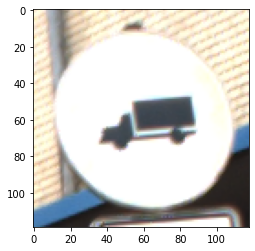

In [0]:
img = plt.imread(trn_fnames[300])
plt.imshow(img);

In [0]:
from torchvision.datasets import ImageFolder
# from torchvision.datasets import VisionDataset

class ImageFolderNew(ImageFolder):
    def _find_classes(self, dir):
        """
        Finds the class folders in a dataset.

        Args:
            dir (string): Root directory path.

        Returns:
            tuple: (classes, class_to_idx) where classes are relative to (dir), and class_to_idx is a dictionary.

        Ensures:
            No class is a subdirectory of another.
        """
        if sys.version_info >= (3, 5):
            # Faster and available in Python 3.5 and above
            classes = [d.name for d in os.scandir(dir) if d.is_dir()]
        else:
            classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
        classes.sort(key=int)
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx


In [0]:
tfms = transforms.Compose([
    # transforms.ToTensor(),
    # transforms.ToPILImage(),
    transforms.Resize((image_size, image_size)),  # PIL Image
    transforms.ToTensor(),        # Tensor
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_dataset = ImageFolderNew(root=train_dir, transform=tfms)

print("Classes in Train DataSet : => ", train_dataset.classes, "\n")
print("Classes in Train DataSet : => ", train_dataset.class_to_idx)

train_loader1 = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
# valid_loader = torch.utils.data.DataLoader(dataset=data_valid, batch_size=batch_size, shuffle=True)
# data_train, data_valid = random_split(train_dataset, [number_of_train, number_of_valid])


Classes in Train DataSet : =>  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42'] 

Classes in Train DataSet : =>  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29, '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35, '36': 36, '37': 37, '38': 38, '39': 39, '40': 40, '41': 41, '42': 42}


In [0]:
data_iter = iter(train_loader1) # it creates an object that allows us to throw the ittrable training loader one element at a time
images, labels = data_iter.next() # it will grab the first batch of our training data
print("X_train : ", images.shape)
print("y_train : ", labels.shape)
X_train = images
y_train = labels

X_train :  torch.Size([2000, 3, 30, 30])
y_train :  torch.Size([2000])


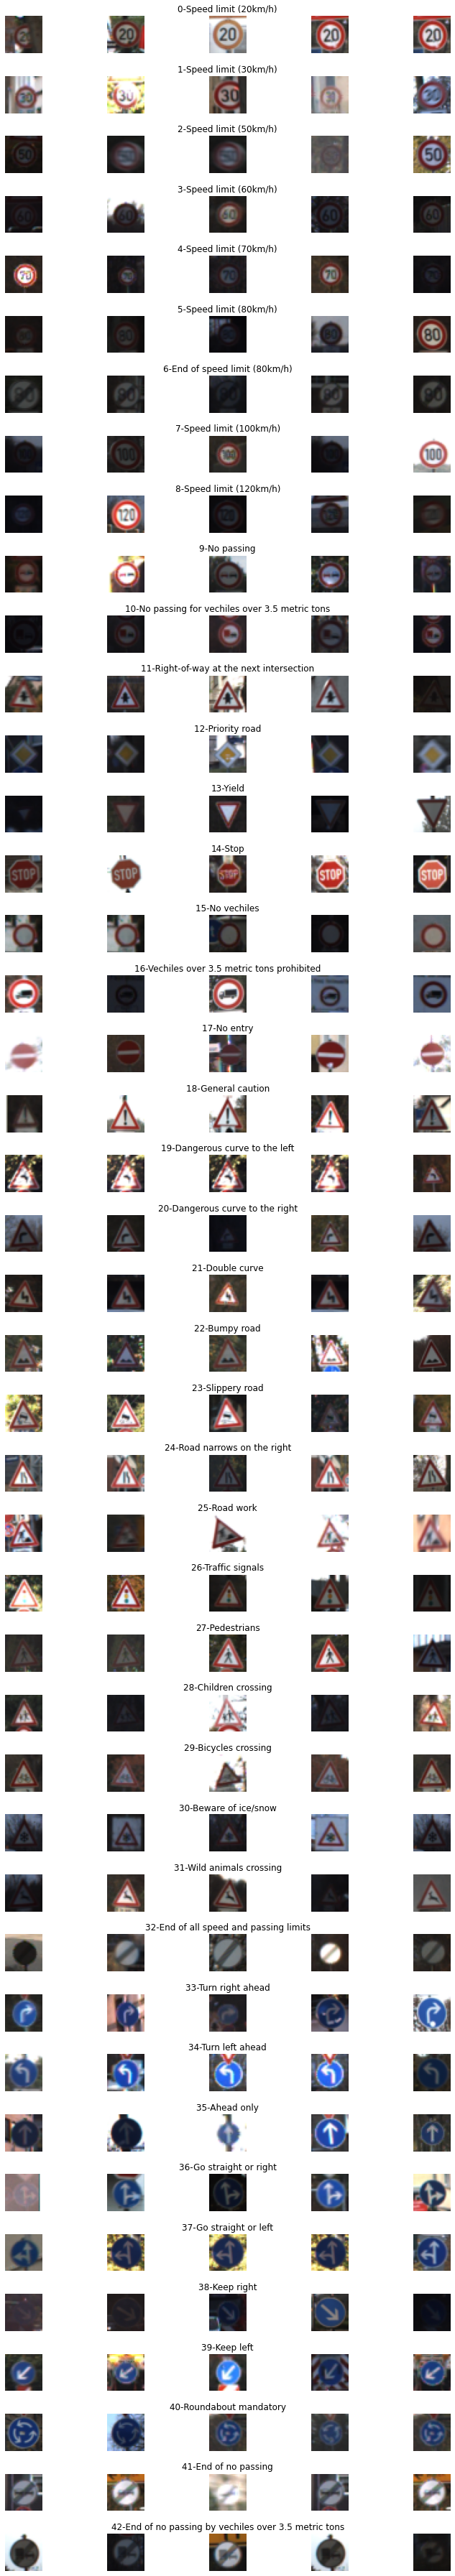

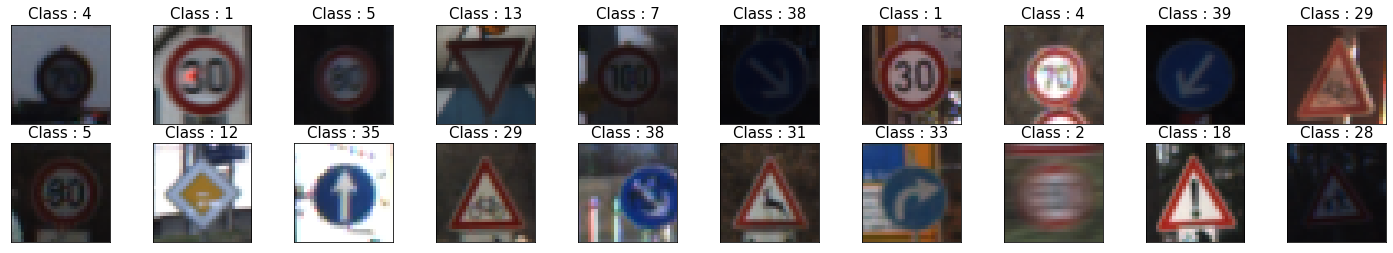

In [0]:
def img_convert(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0) # we reverse the pixels
    image = image * np.array([0.5, 0.5, 0.5]) + np.array([0.5, 0.5, 0.5]) # denormalization
    image = image.clip(0, 1)
    return image

data_names = pd.read_csv('German-Traffic-Signs-Dataset-GTSRB/signnames.csv')
data = pd.read_csv('German-Traffic-Signs-Dataset-GTSRB/Train.csv')

num_of_samples = []

cols = 5
num_of_classes = 43

fig, axs = plt.subplots(nrows=num_of_classes, ncols=cols, figsize=(10, 50))
fig.tight_layout()


for i in range(cols):
    for j, row in data_names.iterrows():
        x_selected = X_train[y_train == j]
        x_selected = x_selected.squeeze()
        axs[j][i].imshow(img_convert(x_selected[random.randint(0, (len(x_selected) - 1)) ,:, :]), cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["SignName"])
            num_of_samples.append(len(x_selected))


    
data_iter = iter(train_loader1) # it creates an object that allows us to throw the ittrable training loader one element at a time
images, labels = data_iter.next() # it will grab the first batch of out training data
fig = plt.figure(figsize=(25, 4)) # width & height of the figure ...

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx + 1, xticks=[], yticks=[]) # 2 rows & 10 columns!
    plt.imshow(img_convert(images[idx]).squeeze(), cmap=plt.get_cmap('gray'))
    ax.set_title("Class : " + str(labels[idx].item()), size=15)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


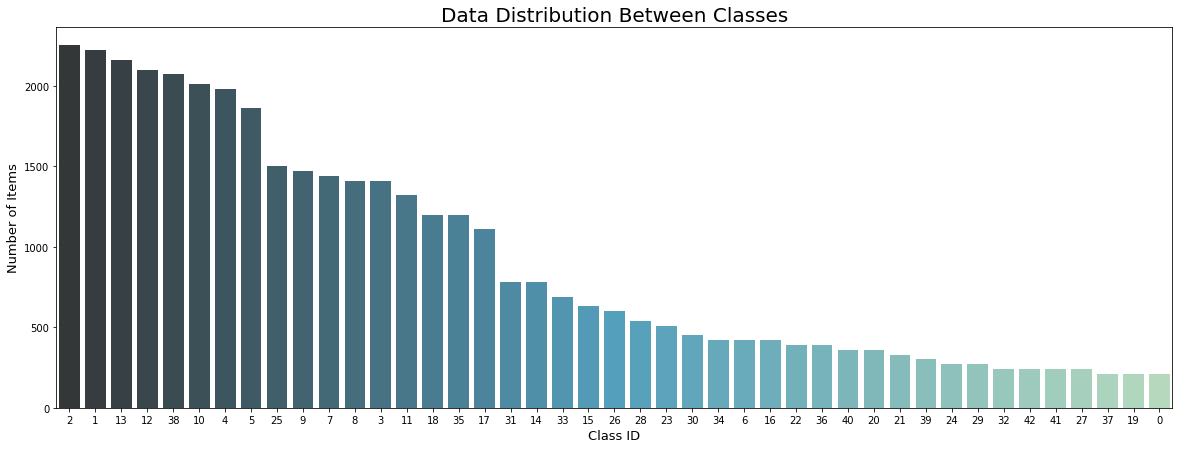

In [0]:
import seaborn as sns

f, ax = plt.subplots(1, 1, figsize=(20, 7))
sns.countplot(x='ClassId', data=data, ax=ax, order=data.ClassId.value_counts().index, palette="GnBu_d")
plt.title("Data Distribution Between Classes", fontsize=20, ha='center')
plt.ylabel("Number of Items", fontsize=13)
plt.xlabel("Class ID", fontsize=13)
plt.show()

In [0]:
data_test = pd.read_csv('German-Traffic-Signs-Dataset-GTSRB/Test.csv')
data_test

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [0]:
from torch.utils.data.dataset import Dataset
from skimage import io, transform

class GTSDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        data = pd.read_csv(csv_file)
        data = data.drop(columns=['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2'])
        self.data = pd.DataFrame(data)
        # df_test = pd.read_csv(META_PATH + 'Test.csv')
        self.data['Path'] = data['Path'].str.lower()
        self.data['ClassId'] = data['ClassId'].apply(str)

        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        pth = self.data.iloc[idx, 1].replace("test/", "")
        img_name = os.path.join(self.root_dir, pth)
        image = io.imread(img_name)
        labels = self.data.at[idx, 'ClassId'] # to access a single item in Pandas DataFrame
        labels = np.array([labels])
        labels = labels.astype('long').reshape(-1, 1)

        sample = [ image, labels]

        if self.transform:
            sample[0] = self.transform(sample[0])
        return sample

In [0]:
image_size = 30
tfms = transforms.Compose([
    transforms.Resize((image_size, image_size)),  # PIL Image
    transforms.ToTensor(),        # Tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ])

tfms2 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((image_size, image_size)),  # PIL Image
    transforms.ToTensor(),        # Tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ])

test_dataset = GTSDataset('German-Traffic-Signs-Dataset-GTSRB/Test.csv', test_dir, transform=tfms2)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=300, shuffle=False)


train_dataset = ImageFolderNew(root=train_dir, transform=tfms)

number_of_train = (0.8 * len(train_dataset)).__int__()
number_of_valid = (0.2 * len(train_dataset)).__int__() + 1

data_train, data_valid = random_split(train_dataset, [number_of_train, number_of_valid])

train_loader = torch.utils.data.DataLoader(dataset=data_train, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=data_valid, batch_size=batch_size, shuffle=True)

In [0]:
class CnnModel(nn.Module):
    def __init__(self):
        super(CnnModel, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=73, kernel_size=5, stride=1, padding=0),
            nn.ReLU(),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=73, out_channels=153, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=153, out_channels=273, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc1 = nn.Linear(6 * 6 * 273, 500)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(500, 43)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        
        out = torch.flatten(out, 1)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        # out = self.softmax(out)
        return out

In [0]:
from torch.optim.lr_scheduler import MultiStepLR
learning_rate = 0.00073
epochs = 30

model = CnnModel().to(CUDA)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

scheduler = MultiStepLR(optimizer, milestones=[50, 70, 90], gamma=0.7)

In [0]:
import time
start_time = time.time()
running_loss_history = []
running_correct_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
    running_loss = 0.0
    running_corrects = 0.0
    val_running_loss = 0.0
    val_running_corrects = 0.0
    for inputs, labels in train_loader:
        if torch.cuda.is_available():
            inputs = inputs.to(CUDA)
            labels = labels.to(CUDA)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

        _, preds = torch.max(outputs, 1)
        
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data) # it will give us the number of correct prediction for a single batch of images...

    else:
        with torch.no_grad(): # it will temprerorerly set all the required grad flags to be false
            for val_inputs, val_labels in valid_loader:
                if torch.cuda.is_available():
                    val_labels = val_labels.to(CUDA)
                    val_inputs = val_inputs.to(CUDA)

                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_corrects += torch.sum(val_preds == val_labels.data)
      
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.float() / len(data_train)
        running_loss_history.append(epoch_loss)
        running_correct_history.append(epoch_acc)

        val_epoch_loss = val_running_loss / len(valid_loader.dataset)
        val_epoch_acc = val_running_corrects.float() / len(data_valid)
        val_running_loss_history.append(val_epoch_loss)
        val_running_corrects_history.append(val_epoch_acc)
        # if (e + 1) % 10 == 0:
        print("Epoch : ", (e+1))
        print('  Training Loss:=> {:.8f},    Training ACC {:.4f} '.format(epoch_loss, epoch_acc.item()))
        print('Validation Loss:=> {:.8f},  Validation ACC {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))
        scheduler.step()
        for param_group in optimizer.param_groups:
            print("*** Learning Rate : => {:.9f}".format(param_group['lr']))
        print("***->>>-----------------------------------------------<<<-***")

print("*************************")
print("--->>> %s seconds <<<---" % (time.time() - start_time))
print("*************************")

Epoch :  1
  Training Loss:=> 0.00429568,    Training ACC 0.6413 
Validation Loss:=> 0.00073578,  Validation ACC 0.9436 
*** Learning Rate : => 0.000730000
***->>>-----------------------------------------------<<<-***
Epoch :  2
  Training Loss:=> 0.00037563,    Training ACC 0.9703 
Validation Loss:=> 0.00027350,  Validation ACC 0.9802 
*** Learning Rate : => 0.000730000
***->>>-----------------------------------------------<<<-***
Epoch :  3
  Training Loss:=> 0.00014393,    Training ACC 0.9904 
Validation Loss:=> 0.00017426,  Validation ACC 0.9872 
*** Learning Rate : => 0.000730000
***->>>-----------------------------------------------<<<-***
Epoch :  4
  Training Loss:=> 0.00007398,    Training ACC 0.9940 
Validation Loss:=> 0.00021289,  Validation ACC 0.9824 
*** Learning Rate : => 0.000730000
***->>>-----------------------------------------------<<<-***
Epoch :  5
  Training Loss:=> 0.00004485,    Training ACC 0.9967 
Validation Loss:=> 0.00014244,  Validation ACC 0.9909 
*** Lea

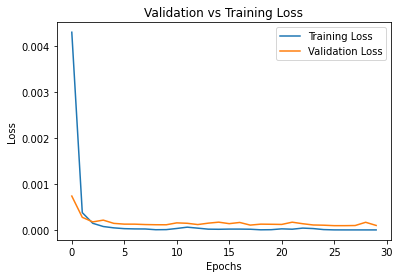

In [0]:
plt.plot(running_loss_history, label='Training Loss')
plt.plot(val_running_loss_history, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Validation vs Training Loss")
plt.legend()

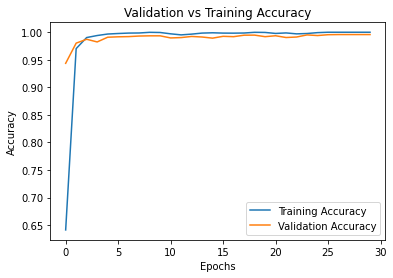

In [0]:
plt.plot(running_correct_history, label="Training Accuracy")
plt.plot(val_running_corrects_history, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation vs Training Accuracy")
plt.legend()

# **Testing Part**

In [0]:
test_running_loss_history = []
test_running_corrects_history = []
test_running_loss = 0.0
test_running_corrects = 0.0

for test_inputs, test_labels in test_loader:
    # print(test_inputs.shape)
    test_labels = test_labels.view(test_labels.shape[0])
    # print(test_labels.shape)
    if torch.cuda.is_available():
        test_labels = test_labels.to(CUDA)
        test_inputs = test_inputs.to(CUDA)


    test_outputs = model(test_inputs)
    test_loss = criterion(test_outputs, test_labels)

    _, test_preds = torch.max(test_outputs, 1)
    test_running_corrects += torch.sum(test_preds == test_labels.data)
    test_running_loss += test_loss.item()
      

test_epoch_acc = test_running_corrects.float() / len(test_dataset)
test_epoch_loss = test_running_loss / len(test_loader.dataset)
print('Test Loss: {:.8f},  Test ACC: {:.4f} '.format(test_epoch_loss, test_epoch_acc.item()))

Test Loss: 0.00113671,  Test ACC: 0.9585 


# Confusion Matrix

100%|██████████| 43/43 [00:09<00:00,  4.33it/s]


[[ 58   2   0 ...   0   0   0]
 [  0 712   2 ...   0   0   0]
 [  0   7 738 ...   0   0   0]
 ...
 [  0   0   0 ...  82   0   0]
 [  0   0   0 ...   0  52   0]
 [  0   0   0 ...   0   1  89]]


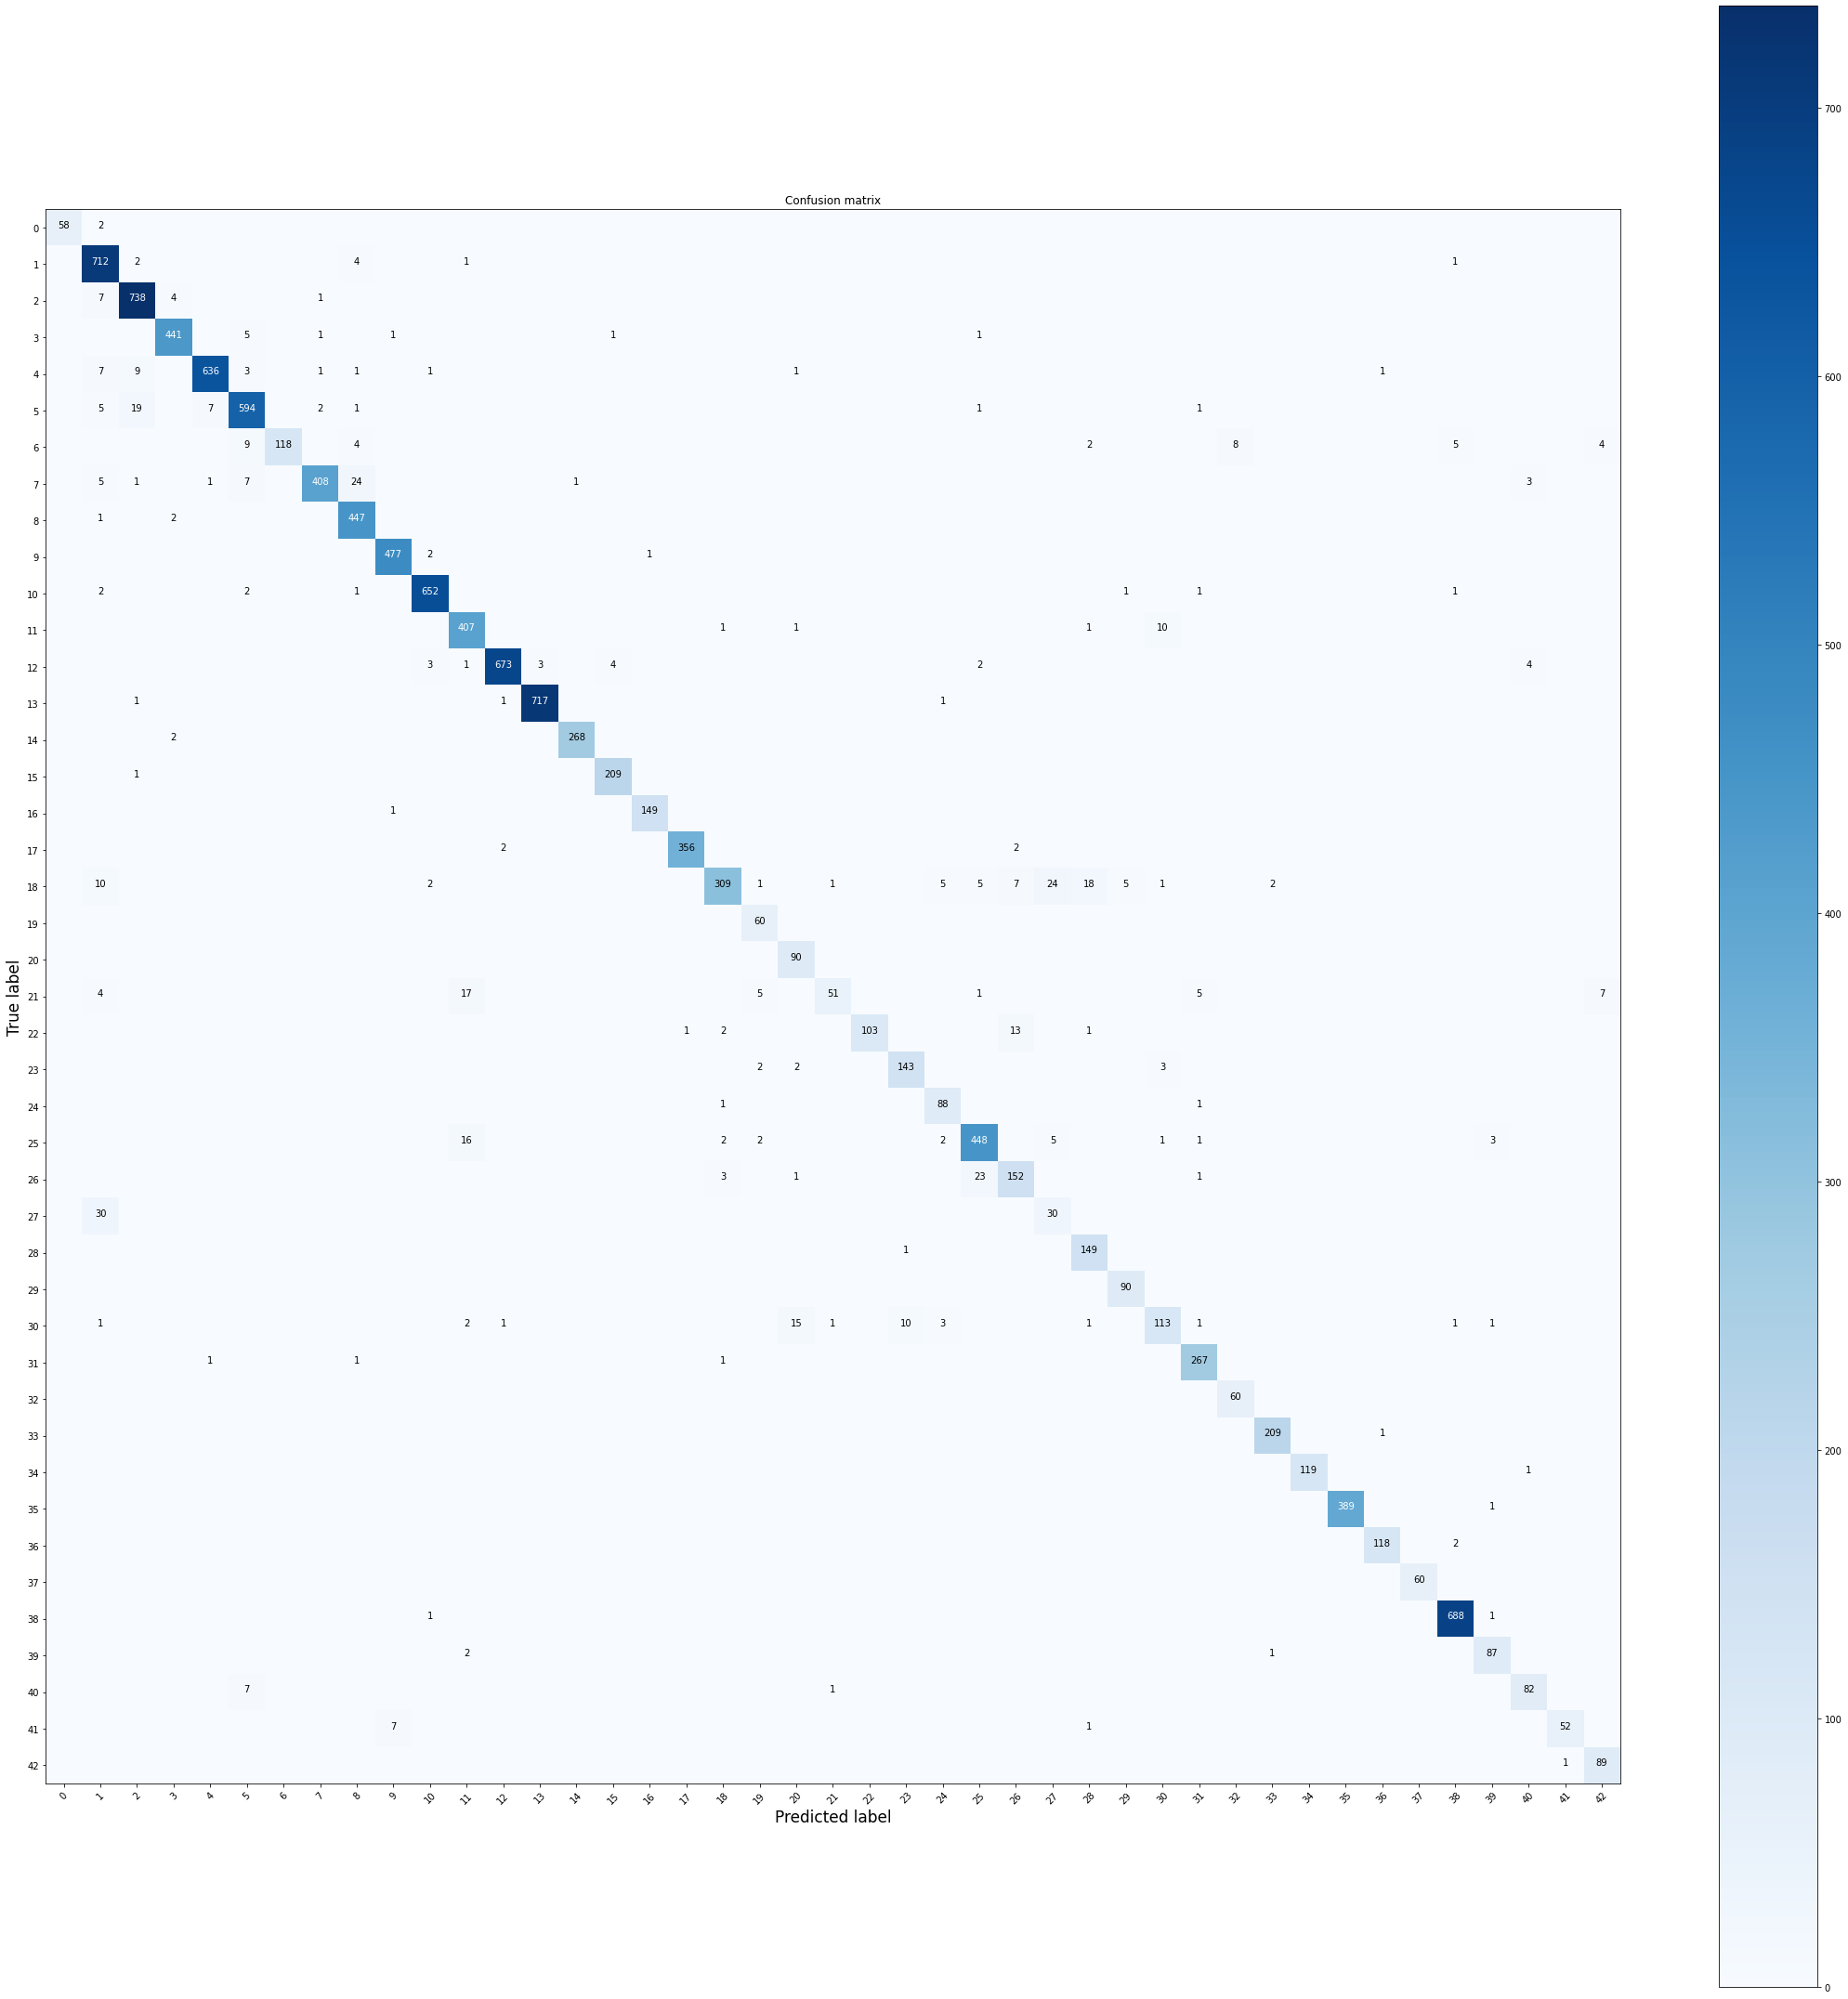

In [0]:
from sklearn.metrics import confusion_matrix
import itertools
from tqdm import tqdm
from torch.autograd import Variable


def plot_confusion_matrix(cm, classes, normalize=False, figsize=(12, 12), title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize: cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        annot = "%d" % cm[i, j] if cm[i, j] > 0 else "" 
        plt.text(int(j), int(i), annot, horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

def to_var(x, volatile=False):
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x, volatile=volatile)

def predict_class(model, dataloader):
    """ Predict probabilities for the given model and dataset
    """
    model.train(False)
    result = []
    y = []
    
    for inputs, targets in tqdm(dataloader):
        targets = targets.view(targets.shape[0])
        if torch.cuda.is_available():
            targets = targets.to(CUDA)
            inputs = inputs.to(CUDA)
        scores = model(inputs)
        _, preds = torch.max(scores.data, 1)
        result += [preds.cpu().numpy()]
        y += [targets.cpu().numpy()]
        
    result = np.concatenate(result)
    y = np.concatenate(y)
    return result, y

y_pred, y_true = predict_class(model, test_loader)
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, train_dataset.classes, normalize=False, figsize=(30, 30))